In [1]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast 
import matplotlib.ticker as mtick


dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\ADMIN\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [85]:
df_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]
df_us = df_us.explode('job_skills')

df_us['job_posted_month_numb'] = df_us['job_posted_date'].dt.month
df_us['job_posted_month'] = df['job_posted_date'].dt.month_name()
df_us.sort_values('job_posted_month_numb', ascending=True, inplace=True)
df_us_pivot = df_us.pivot_table(index="job_posted_month_numb", columns='job_skills', fill_value=0, aggfunc='size')
df_us_pivot.loc['Total'] = df_us_pivot.sum()
df_us_pivot = df_us_pivot[df_us_pivot.loc['Total'].sort_values(ascending=False).index]
df_us_pivot.drop('Total', inplace=True)
df_us_pivot

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month_numb,,,,,,,,,,,,,,,,,,,,,
1,4601,3592,2488,2254,1832,1513,1337,968,972,718,...,0,0,0,0,0,0,1,1,0,0
2,3168,2587,1676,1618,1212,1045,1122,738,705,514,...,0,0,0,0,0,0,0,0,0,0
3,3226,2661,1804,1683,1238,1141,1054,736,669,418,...,1,0,0,0,0,0,0,0,0,0
4,3220,2549,1789,1679,1302,1038,1057,695,650,439,...,0,0,0,0,0,1,0,0,0,0
5,2581,2118,1432,1349,972,867,860,557,515,358,...,0,0,0,0,0,0,0,0,0,1
6,2862,2382,1628,1609,984,1017,989,721,624,414,...,0,1,0,0,1,0,0,0,0,0
7,2609,2118,1533,1438,996,881,881,587,549,401,...,0,0,0,0,0,0,0,0,0,0
8,3414,2731,1951,2025,1276,1271,1208,752,746,484,...,0,0,0,0,0,0,0,0,0,0
9,2295,1801,1353,1229,856,746,820,478,475,359,...,0,0,0,0,0,0,0,0,0,0


In [86]:
total = df_us.groupby('job_posted_month_numb').size()

In [109]:
df_month_count_skill = df_us_pivot.div(total/100, axis=0)
df_month_count_skill = df_month_count_skill.reset_index()
df_month_count_skill['job_posted_month'] = df_month_count_skill['job_posted_month_numb'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_month_count_skill.set_index('job_posted_month', inplace=True)
df_month_count_skill = df_month_count_skill.drop(columns='job_posted_month_numb')
df_month_count_skill


job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,14.161716,11.056050,7.657977,6.937733,5.638832,4.656961,4.115239,2.979470,2.991782,2.209979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.003078,0.003078,0.000000,0.000000
Feb,13.657527,11.152785,7.225384,6.975341,5.225039,4.505087,4.837041,3.181583,3.039317,2.215899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Mar,13.862748,11.434833,7.752138,7.232177,5.319926,4.903098,4.529242,3.162735,2.874823,1.796227,...,0.004297,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Apr,13.813221,10.934752,7.674488,7.202608,5.585346,4.452833,4.534340,2.981425,2.788383,1.883231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00429,0.000000,0.000000,0.000000,0.000000
May,13.726533,11.264160,7.615806,7.174387,5.169388,4.610966,4.573738,2.962293,2.738925,1.903951,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.005318
Jun,13.362592,11.121487,7.601083,7.512373,4.594267,4.748343,4.617611,3.366327,2.913437,1.932954,...,0.000000,0.004669,0.000000,0.000000,0.004669,0.00000,0.000000,0.000000,0.000000,0.000000
Jul,13.267901,10.770952,7.795972,7.312856,5.065094,4.480269,4.480269,2.985151,2.791904,2.039260,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Aug,13.325007,10.659225,7.614847,7.903673,4.980290,4.960774,4.714882,2.935092,2.911674,1.889075,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
Sep,13.122534,10.297902,7.736291,7.027274,4.894505,4.265538,4.688661,2.733147,2.715993,2.052719,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='job_posted_month'>

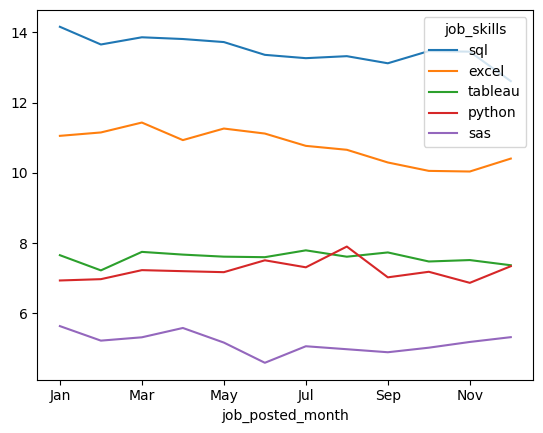

In [111]:
df_month_count_skill.iloc[:, :5].plot()